# Capture Code Debug Notebook

This notebook serves as a debug workspace so I can keep the other notebooks clean.
All function definitions and capture code preamble is loaded into this workbook to replicate a test space.

## Initialize the Notebook

In [1]:
import numpy as np
import scipy as sp
import pandas as pd
from scipy import interpolate
import time


import scipy.integrate as integrate
import matplotlib.pyplot as plt
%matplotlib inline

print ('Complete')

Complete


## Importing Earth Density Data (PREM500)
The raw data from PREM500 has been converted into MKS units, however, the table where that data came from [51] gives the radius in $km$ and density in $kg/cm^3$

In [2]:
# Radius is column 1, Density is column 2
# Radius in meters: verified by REF [51] Table 1 pg. 312
# Density in Kg/m^3, verified by REF [51] Table 1 pg. 312

# This section grabs the data and converts it to MKS units
data = pd.read_csv('PREM500.csv', sep = ',')
radiusTemp1 = data[[0]]  # Radius in Meters
densityTemp1 = data[[1]] # Density in kg/m^3


# The interpolation function doesn't like these objects, so they need to be massaged into 1-D numpy arrays
radiusListBadUnits = np.asarray(radiusTemp1).squeeze()
densityListBadUnits = np.asarray(densityTemp1).squeeze()

print ('Complete')

Complete


### A Note on Units:
The variable radiusListBadUnits has units of Meters

The variable densityListBadUnits has units of kg/m^3

The following cell converts the length of both to cm.

In [3]:
radiusList = radiusListBadUnits * 100 # cm
densityList = densityListBadUnits * (100)**-3 * 1000 # g/cm^3

print ('Complete')

Complete


### Shell Thickness Check

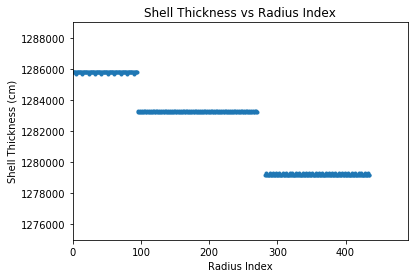

Complete


In [4]:
radius2 = radiusList[0:len(radiusList)-1]
s = [0]
for i in radius2:
    s.append(i)

deltaRList = radiusList[0:len(radiusList)] - s[0:len(s)]

xRange = range(0,len(radiusList))

plt.plot(xRange,deltaRList,'.')
plt.title('Shell Thickness vs Radius Index')
plt.xlabel('Radius Index')
plt.ylabel('Shell Thickness (cm)')
plt.axis([0,491,1.275e6,1.289e6])
plt.show()

print ('Complete')

### Shell Density Check

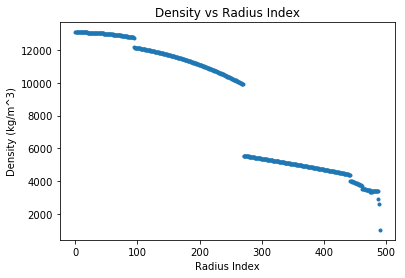

Complete


In [5]:
plt.plot(xRange,densityListBadUnits,'.')
plt.xlabel('Radius Index')
plt.ylabel('Density (kg/m^3)')
plt.title('Density vs Radius Index')
plt.show()
print ('Complete')

### Enclosed Mass Check

In [6]:
mass = 0.
for i in xRange:
    mass = mass + 4. * np.pi * radiusList[i]**2 * densityList[i] * deltaRList[i]
print ('Enclosed mass = {0} g'.format(mass))
print ('Complete')

Enclosed mass = 5.990577490724785e+27 g
Complete


### Shell Mass
Given a radius *index*, shellMass returns the mass of the shell at that radius index

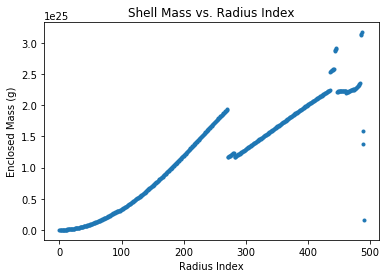

Complete


In [7]:
shellMassList = []

for i in xRange:
    shellMassList.append(4 * np.pi * radiusList[i]**2 * densityList[i] * deltaRList[i])

plt.plot(xRange,shellMassList,'.')
plt.title('Shell Mass vs. Radius Index')
plt.xlabel('Radius Index')
plt.ylabel('Enclosed Mass (g)')

plt.show()

# print shellMassList[0:4]
print ('Complete')

### Enclosed Mass at Each Radius

Give enclosedMass the *index* of the radius, and it returns the mass enclosed up to that radius.

This is a list, not an interpolated function, so it only works for valid radii.

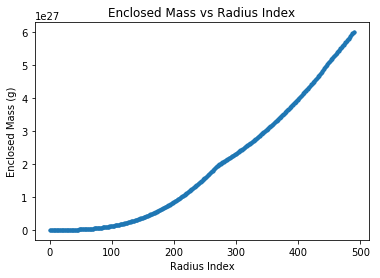

Complete


In [8]:
# This is with a radius list and a shellMass list
enclosedMassList = []
tempSum = 0
for i in shellMassList:
    tempSum = tempSum + i
    enclosedMassList.append(tempSum)
    
plt.plot(xRange,enclosedMassList,'.')
plt.title('Enclosed Mass vs Radius Index')
plt.xlabel('Radius Index')
plt.ylabel('Enclosed Mass (g)')
# plt.axis([0,550,0,6.5e24])
plt.show()

# print enclosedMassList[0:4]

print ('Complete')

## Conversions and Atomic Definitions

In the following cell, we initialize usefull unit conversions and dictionaries storing various atomic information.

In [9]:
################################################################################
# Conversions
################################################################################

def Gev2Tev(par1):
    return par1*10**-3

def amu2Gev(par1):
#     return 0.9314941 * par1 # GeV
    return 0.938272 * par1 # Taken directly from Flip notebook

def amu2g(par1):
    return 1.66053892e-24 * par1 # g

def GeV2s(par1):
    return 1.52e24 * par1 # s^-1

def s2GeV(par1):
#     return 1.52*10**24 * par1 # GeV^-1
    return (6.58e-25)**-1 * par1 # GeV^-1

def GeV2cm(par1):
    return 5.06*10**13 * par1 # cm^-1

def cm2GeV(par1):
#     return 5.06*10**13 * par1 # GeV^-1
    return (0.197e-13)**-1 * par1 # GeV^-1

def KeltoGeV(par1):
    return 8.62*10**-14 * par1 # GeV

def yr2s(par1):
    return (3.16888*10**-8)**-1 * par1 # s

def ev2Gev(par1):
    return par1 * 10**6 # GeV

def eV2kg(par1):
    return 1.782661845* 10**-36 * par1 # kg

def g2Gev(par1):
#     return 5.609588845*10**32 * par1 #GeV
    return (1.8e-24)**-1 * par1 #GeV

################################################################################
# Atomic Dictionary Definitions
################################################################################

elementList = [
    'O16' ,
    'Si28',
    'Mg24',
    'Fe56',
    'Ca40',
    'P31' ,
#     'Na11',
    'S32' ,
    'Ni58',
    'Al27',
    'Cr52',
]

# From http://www.chem.ualberta.ca/~massspec/atomic_mass_abund.pdf
isotopicMasses = {
    'O16': 15.994915 ,
    'Si28': 27.976927,
    'Mg24': 23.985042,
    'Fe56': 55.934942,
    'Ca40': 39.962591,
    'P31': 30.973762,
#     'Na11',
    'S32': 31.972071 ,
    'Ni58': 57.935348,
    'Al27': 26.981538,
    'Cr52': 51.940512,
}


atomicNumbers = {
    'H1': 1.,
    'He4': 4.,
    'He3': 3.,
    'Na11': 23.,
    'C12': 12.,
    'C13':13.,
    'N14':14.,
    'N15':15.,
    'O16':16.,
    'O17':17. ,
    'O18':18.,
    'Ne20':20.,
    'Na23':23.,
    'Mg24':24., # 78%
    'Al27':27.,
    'Si28':28.,
    'P31':30.,
    'S32':32.,
    'Cl35':35., # 75%
    'Ar40':40.,
    'K39':39.,
    'Ca40':40.,
    'Sc45':45.,
    'Ti48':48., # 74%
    'V51':51.,
    'Cr52':52., # 83%
    'Mn55':55.,
    'Fe56':56.,
    'Co59':59.,
    'Ni58':59., # 58%
}

nProtons = { # This is Z_N
    'H1':1.,
    'He3':2.,
    'He4':2.,
    'He3':2.,
    'Na11': 11.,
    'C12':6.,
    'C13':6.,
    'N14':7.,
    'N15':7.,
    'O16':8.,
    'O17':8.,
    'O18':8.,
    'Ne20':10.,
    'Na23':11.,
    'Mg24':12., # 78%
    'Al27':13.,
    'Si28':14.,
    'P31':15.,
    'S32':16.,
    'Cl35':17., # 75%
    'Ar40':18.,
    'K39':19.,
    'Ca40':20.,
    'Sc45':21.,
    'Ti48':22., # 74%
    'V51':23.,
    'Cr52':24., # 83%
    'Mn55':25.,
    'Fe56':26.,
    'Co59':27.,
    'Ni58':28., # 58%
}

# Mass Fraction Dictionary
coreMassFrac = {
    'Na11': 0.0,
    'O16' : 0.0,
    'Mg24': 0.0,
    'Al27': 0.0,
    'Si28': 0.06,
    'P31' : 0.002,
    'S32' : 0.019,
    'Ca40': 0.0,
    'Cr52': 0.009,
    'Fe56': 0.855,
    'Ni58': 0.052,
}

mantleMassFrac = {
    'Na11': 0.0027,
    'O16' : 0.440,
    'Mg24': 0.228,
    'Al27': 0.0235,
    'Si28': 0.210,
    'P31' : 0.00009,
    'S32' : 0.00025,
    'Ca40': 0.0253,
    'Cr52': 0.0026,
    'Fe56': 0.0626,
    'Ni58': 0.00196,
}
print ('Complete')

Complete


## Model Parameters and Constants

In this cell, we initialize all model parameters as global variables.

In [11]:
################################################################################
# Constants
################################################################################
global c
global G
global M_E
global R_earth
global V_dot
global V_cross
global V_gal
global u_0
global k
global n_X
global mf

c = 3.0*10**10 # cm/s
G = 6.674e-11 * 100**3 *(1000)**-1 # cm^3/g s 
# M_E = 5.972e27 # g
# R_earth = 6.37e6 # m
V_dot = 220.0*10**5 # cm/s
V_cross = 298.0*10**5 # cm/s
V_gal = 550.0*10**5 # cm/s
u_0 = 245.0*10**5 # cm/s
k = 2.5

print ('Complete')

Complete


## Escape Velocity: $v_{\oplus}(r)$

The escape velocity in natural units is given by:
$$ V_{esc}^2 = \frac{2G}{c^2} \left[ \int_{0}^{R_{earth}} \frac{M_{enc}(s)}{s^2} \, ds + \frac{M_{total}}{R_{earth}} \right] $$

However, we are given discretized data, so we convert the integral into a discrete sum over the radius of earth:
$$ V_{esc}^2 = \frac{2G}{c^2} \left[ \sum_i \frac{M_{enc}(s)}{s^2} \, \Delta R + 
\frac{M_{total}}{R_{earth}} \right] $$

where $M_{enc}(s)$ is the mass enclosed at radius $s$ and $\Delta R$ is the change in radius going from the previous radius  to the current radius $\Delta R =$ r[i] - r[i-1].

The accumulate function acts just like the "Accumulate" in mathematica. It adds up whatever the summand is starting at "index" and sums over the length of the radius index.


Escape Velocities are stored in the list: escVel2List

Note: The value from escVel2List[1] is assigned to the first slot of escVel2List to work around a 'nan' escape velocity at r=0

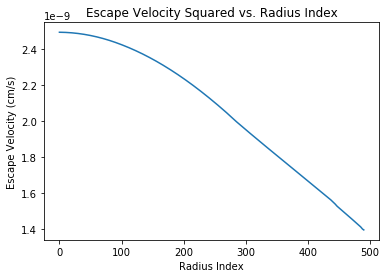

Complete


In [13]:
def accumulate(index):
    factor = 2.*G/c**2
    constant = max(enclosedMassList) / max(radiusList)
    
    tempSum = 0    
    for i in range(index,len(radiusList)-1):
        summand = enclosedMassList[i] * deltaRList[i] / (radiusList[i])**2
        tempSum += summand
        
    return factor*(tempSum + constant)

escVel2List = []
for i in xRange:
    escVel2List.append(accumulate(i))

    
    
# print (escVel2List[245])
    
plt.plot(xRange,escVel2List)
plt.xlabel('Radius Index')
plt.ylabel('Escape Velocity (cm/s)')
plt.title('Escape Velocity Squared vs. Radius Index')
plt.show()          
    
# plt.plot(radiusList,escVel2List,'.')
# plt.xlabel('Radius (m)')
# plt.ylabel('Escape Velocity (m/s)')
# plt.title('Escape Velocity vs. Radius')
# plt.show()


# print escVel2List[0:4]

print ('Complete')

## Number Densities

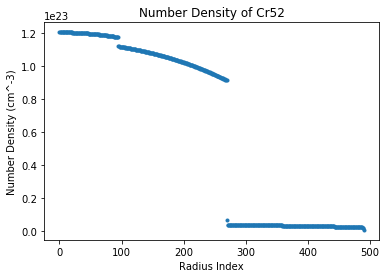

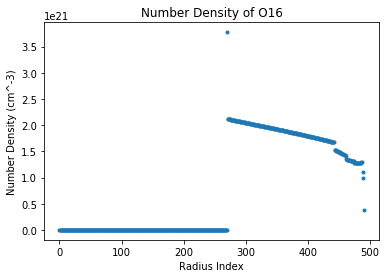

Complete


In [14]:
range1 = range(0,len(radiusList))
mf = 0

def numDensityList(element):
    numDensityList = []
    for i in range1:
        if radiusList[i] < 348000000:
            mf = coreMassFrac[element]
        elif radiusList[i] >= 348000000:
            mf = mantleMassFrac[element]
        elif radiusList[i] > 348000000:
            mf = 0

#         n_i = mf *  densityList[i] /(amu2Gev(atomicNumbers[element])) * 6.02e23
        n_i = mf *  densityList[i] / (isotopicMasses[element]) * 6.02e23

        numDensityList.append(n_i)
        
    return numDensityList


plt.plot(range1, numDensityList('Fe56'),'.')
plt.title('Number Density of Cr52')
plt.xlabel('Radius Index')
plt.ylabel('Number Density (cm^-3)')
plt.show()
plt.plot(range1, numDensityList('Ca40'),'.')
plt.title('Number Density of O16')
plt.xlabel('Radius Index')
plt.ylabel('Number Density (cm^-3)')
plt.show()

# print numDensityList('O16')
print ('Complete')

## List Interpolations

At the present moment, I have the following lists:
    - radius (radius)
    - density (density)
    - shell thickness (deltaR)
    - shell mass (shellMass)
    - enclosed mass (enclosedMass)
    - escape velocity squared (escVel)
    - number density of a *single* element (numDensityList)

I need to interpolate the following lists into functions:
    - density
    - enclosed mass
    - escape velocity squared

In [15]:
# densityInterp = interpolate.interp1d(radiusList,densityList,kind='linear') #kg/cm^3
enclosedMassInterp = interpolate.interp1d(radiusList,enclosedMassList,kind='linear') # kg
escVel2Interp = interpolate.interp1d(radiusList,escVel2List,kind='linear') # 1/c
densityInterp = interpolate.interp1d(radiusList,densityList,kind='linear') # kg/cm^3

# densityInterp = interpolate.interp1d(s,densityList,kind='linear') #kg/m^3
# enclosedMassInterp = interpolate.interp1d(s,enclosedMassList,kind='linear')
# escVel2Interp = interpolate.interp1d(s,escVel2List,kind='linear')

print ('Complete')

Complete


### Escape Velocity Interpolation Check
Note: Over the entire interpolation range, the interpolation is good, but depending on where you zoom in on the graph, it will look off.

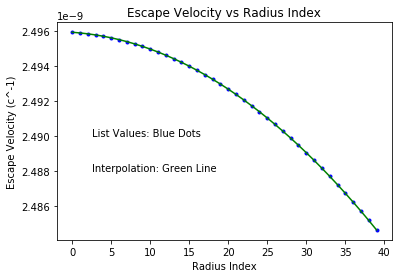

Complete


In [16]:
alist = range(0,40)
tempEsc = []
for i in alist:
    tempEsc.append(escVel2List[i])
    
plt.plot(alist,tempEsc,'b.',alist,escVel2Interp(radiusList[alist]),'g-')
plt.xlabel('Radius Index')
plt.ylabel('Escape Velocity (c^-1)')
plt.title('Escape Velocity vs Radius Index')
plt.text(2.5,2.490e-9,'List Values: Blue Dots')
plt.text(2.5,2.488e-9,'Interpolation: Green Line')
plt.show()
print ('Complete')

-----------

# Capture Rate

Our final goal is to calculate:

$$ C_{cap} = \sum_n C^N_{cap} = \sum_n n_X \, c^N_{cap,red} $$

where  $C^N_{cap,red}$ is the product of three integrals over the radius of earth $r$, the incident DM velocity $u$, and the DM recoil energy $E_R$. 
The reduced capture rate $c^N_{cap,red}$ is given by:

$$
c^N_{cap,red} = 
\int_{0}^{R_{\oplus}}dr \, 4 \pi r^2 n_N(r) 
\int_{0}^{V_{gal}/c} du \, 4 \pi u^2 f(u) \frac{u^2 + v_{\oplus}^2(r)}{u}
\int_{E_{min}}^{E_{max}} \, dE_R \frac{d\sigma_N}{dE_R} \Theta (\Delta E)
$$

where finally, $ \frac{d\sigma_N}{dE_R} $ is given by:

$$ \frac{d\sigma_N}{dE_R} \approx 
8 \pi \epsilon^2 \, \alpha_X \, \alpha \, Z_N^2 \, \frac{m_N}{(u^2 + v_{\oplus})^2(2m_NE_R + m_{A}^2)^2} \left | F_N \right| ^2$$

### Motivation
The motivation for the following calculations is to reduce the actual computation as much as possible by multiplying by all constant factors at the end of the calculation.

Factors that are pulled out of calculations will be acounted for in a running total for the length of this section under the heading:

##### Factors Removed

## Helm Form Factor: $|F_N(E_R)|^2$
The Helm Form Factor is given by:
$$ \left| F_N(E_R) \right| ^2 = e^{[-E_R/E_N]} $$ (see eqn (10) of arXiv: 1509.07525v2)

where $E_N \equiv \frac{0.114 }{ A_{N}^{5/3}} \space GeV$ is the characteristic energy of a nucleus with atomic number $A_N$

This factor accounts for the effective size of a target nucleus in a DM -- nucleus when an incoming DM particle scatters of a nucleus inside the earth.

In [17]:
def formFactor2(element, E):
#     mn = amu2Gev(atomicNumbers[element])
    E_N = 0.114/((atomicNumbers[element])**(5./3))
    FN2 = np.exp(-E/E_N)
    return FN2

print ('Complete')

Complete


## Cross Section Integrand: $ \frac{d\sigma _N}{dE_R} $

The following cell modifies the cross section integrand given by:
$$ \text{eqn09Guts}  = \frac{m_N}{(2m_N E_R + m_{A} ^2)^2} \left| F_N \right|^2  $$

with dimension : $[\text{crossSection}] = \frac{1}{GeV^3}$

For future use:
$$ \text{crossSectionApprox} = \left| F_N \right|^2 $$

##### Factors Removed (crossSection):  $8\pi \epsilon^2 \alpha_X \alpha Z_N^2$
##### Factors Removed (crossSectionApprox): $8\pi \alpha_X \alpha \frac{\epsilon^2}{m_A^4} m_N Z_N^2$

In [86]:
def crossSection(element, m_A, E): # returns 1/GeV^3
    mn = amu2Gev(atomicNumbers[element])
    fN = formFactor2(element,E)
    function = (mn * fN ) / ((2*mn*E + m_A**2)**2)
    return function

def crossSectionApprox(element, E):
#     mn = amu2Gev(atomicNumbers[element])
#     function = (mn * formFactor2(element,E) ) / (m_A**4)
    fN = formFactor2(element,E)
    function = fN
    return function

def crossSectionTest(element, E):
    mN = amu2Gev(atomicNumbers[element])
    fN = formFactor2(element,E)
    function = mN * fN
    return function

# a1 = crossSection('Ni58', 0.01, 0.0000025)
# b1 = crossSectionApprox('Ni58', 0.0000025)
# b2 = crossSectionTest('Ni58', 0.0000025)

# print ('Actual     : {0}'.format(a1))
# print ('Hard Approx: {0}'.format(b1))
# print ('Soft Approx: {0}'.format(b2))

# print (a1-b2)

print ('Complete')

Complete


## Incident Dark Matter Velocity Distribution (eqn17)
In the following cell we calculate the normalization constant $N_0$ for the incident dark matter velocity distribution:

\begin{equation} \frac{1}{N_0} = \int_{0}^{V_{gal}/c} f(u) \ du = \text{tempA} \end{equation}
where $u$ is a naturalized velocity and $f(u)$ is the incident DM velocity distribution which we take to be Maxwell-Boltzmann in shape:

$$ \text{DMVelDist} = f(u) =  N_0 \left[ exp \left ( 
\frac{v^2_{gal}-u^2}{ku^2_0}\right) -1 \right] ^k
\Theta(v_{gal} - u) $$

Typical values for $v_{gal}$ (km/s), $u_0$ (km/s), and $k$ respectively lie between:

$$ 220<u_0<270 \qquad 450<v_{gal}<650 \qquad 1.5<k<3.5 $$

For computations, we take $u_0 = 245\times 10^6$ cm/s, $v_{gal} = 550\times10^6$ cm/s and $k = 2.5$


In [87]:
# u is now a naturalized velocity
def DMVelDistNormalization(u):
# The if-else structure accounts for the Heaviside function
    if ((V_gal/c) - u < 0):
        temp = 0.
        
    elif ( ((V_gal/c) - (u)) >= 0):
        numerator = ((V_gal/c)**2 - (u)**2)
        denominator = (k * (u_0/c)**2)
        arg = ( numerator / denominator)    
        temp = 4*np.pi*(u)**2 * (np.expm1(arg))** k
    return temp

tempA = integrate.quad(DMVelDistNormalization, 0, V_gal/c)[0]
N_0 = 1./tempA
# print (DMVelDistNormalization(0))

def DMVelDist(u, N_1 = N_0): 
# f(u) has stuff/u^2 so in the "volume" jacobian, the u^2s cancel
# The if-else structure accounts for the Heaviside function
# N_1 is the normalization 
    if ((V_gal/c - u) < 0):
        temp = 0
        
    elif ((V_gal/c - u) >= 0):
        numerator = ((V_gal/c)**2 - (u)**2)
        denominator = (k * (u_0/c)**2)
        arg = ( numerator / denominator)
        temp = N_1 * (np.expm1(arg) ) ** k
#         temp = N_1 * 4*np.pi*(u)**2  * (np.expm1(arg) ) ** k
    return temp

# print (DMVelDist(10**-5))

print ('Complete')

Complete


## Modified Dark Matter Velocity Distribution (eqn16)

The modified distribution $ f_{\oplus}$ is the annular and angular averaged dark matter distribution in the rest frame of Earth given by:

\begin{align}
\text{ModDMVelDist} &= f_{\oplus}(u) = \\
&\frac{1}{4} \int_{-1}^{1}\int_{-1}^{1} dcos\theta \, dcos\phi \space
   f \left[ \left( u^2 (V_{\odot} + V_{\oplus}cos\phi)^2 + 2u(V_{\odot} + V_{\oplus} cos\phi) cos\theta \right) ^{1/2} \right]
  \end{align}

In [88]:
def ModDMVelDist(u):
    def integrand(x, y): #x = cos(theta), y = cos(phi)
        return 0.25 * DMVelDist( ( u**2 + ((V_dot/c) + (V_cross/c) * y)**2 \
                                  + 2 * u * ((V_dot/c) + (V_cross/c) * y) *x)** 0.5  )

    return integrate.dblquad(integrand, -1, 1, lambda y: -1, lambda y: 1)[0]


print ('Complete')

Complete


### Graphing and Interpolating the Modified DM Velocity Distribution

#### Graph

Complete


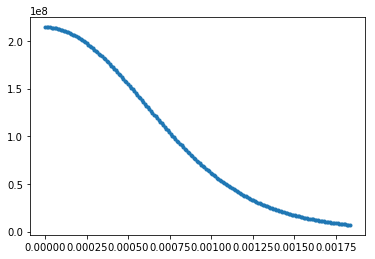

In [89]:
velRange = np.linspace(0,V_gal/c,200)

ModDMVect = []
for vel in velRange:
    ModDMVect.append(ModDMVelDist(vel))
    
plt.plot(velRange,ModDMVect,'.')


print ('Complete')

#### Interpolate

Complete


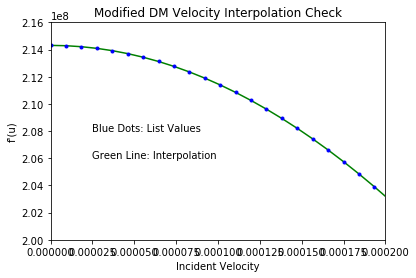

In [29]:
# Interpolate this list
DMVect = []
ModDMVelInterp = interpolate.interp1d(velRange,ModDMVect,kind='linear')

for vel in velRange:
    DMVect.append(ModDMVelInterp(vel))

    
plt.plot(velRange,DMVect,'green', velRange, ModDMVect, 'b.')
plt.axis([0.,0.0002,2.0e8,2.16e8])
plt.xlabel('Incident Velocity')
plt.ylabel("f'(u)")
plt.title('Modified DM Velocity Interpolation Check')
plt.text(0.000025,2.08e8,'Blue Dots: List Values')
plt.text(0.000025,2.06e8,'Green Line: Interpolation')
print ('Complete')

### Emin and Emax Initialization (eqn13)
In the following cell, we initialize the Emin and Emax functions where
$$ E_{Min} = \frac{1}{2} m_X u^2 \qquad E_{Max} = 2 \frac{\mu^2}{m_N} (u^2 + v_{\oplus}^2)$$  

In [30]:
def eMin(u, m_X):
    function = (0.5) * m_X * u**2
    assert (function >=0), '(u, m_X): (%e,%e) result in a negative eMin' % (u, m_X)
    return function

def eMax(element, m_X, rIndex, u):
    mn = amu2Gev(atomicNumbers[element])
    mu = mn*m_X / (mn + m_X)
    vCross2 = escVel2List[rIndex]
    function = 2*mu**2 *(u**2 + vCross2)/mn
    assert (function >= 0), '(element, m_X, rIndex, u): (%s, %e, %i, %e) result in negative eMax' %(element, m_X, rIndex, u)
    return function

print ('Complete')

Complete


## Calculating the Capture Integral
In the following cell, we calculate the velocity and recoil energy integrals:

$$ \text{IntDuDEr} = \int_{0}^{uInt} du\space u \, f(u) \int_{E_{min}}^{E_{Max}} dE_R \space \frac{d \sigma_N}{dE_R}  $$ 

with dimension: $[ \text{IntDuDEr}] = \frac{1}{GeV^3}$

where $$ u_{int}^2 = \frac{2\mu_N^2}{m_N} \frac{1}{ \left( \frac{1}{2m_X} - \frac{2\mu_N^2}{m_N} \right)  } v_{\oplus}^2 $$

See Appendix A for a discussion of calculating this integral.

For future reference:
$$ \text{IntDuDErApprox} = \int_{0}^{uInt} du\space u \, f(u) \int_{E_{min}}^{E_{Max}} dE_R \space |F_N|^2  $$ 

##### Factors Removed (IntDuDEr):  $(4\pi)(8\pi \epsilon^2 \alpha_X \alpha Z_N^2)$
##### Factors Removed (IntDuDErApprox): $(4\pi)(8\pi \alpha_X \alpha \frac{\epsilon^2}{m_A^4} m_N Z_N^2)$

In [32]:
def EminEmaxIntersection(element, m_X, rIndex):
    mn = amu2Gev(atomicNumbers[element])
    mu = (mn*m_X)/(mn+m_X)
    vCross2 = escVel2List[rIndex]
    # Calculate the intersection uInt of eMin and eMax given a specific rIndex
    A = 1/2. * m_X
    B = 2. * mu**2 / mn
    uInt = np.sqrt( ( B * vCross2) / (A-B) )
    
    return uInt

# a = EminEmaxIntersection('Fe56',100,245)
# print (a/2)

def IntDuDEr(element, m_X, m_A, rIndex):
    mn = amu2Gev(atomicNumbers[element])
    mu = (mn*m_X)/(mn+m_X)
    vCross2 = escVel2List[rIndex]
    
    def integrand(E,u):
#         fu = DMVelDist(u)
        fu = ModDMVelInterp(u)

        integrand = crossSection(element, m_A, E) * u * fu
#         inte = crossSection(E, m_A, element) * u

#         assert (inte >= 0), '(E,u): (%e,%e) result in a negative integrand' % (E,u)
        return integrand
    
    # Calculate the intersection uInt of eMin and eMax given a specific rIndex
    uInt = EminEmaxIntersection(element,m_X,rIndex)
    
    uLow = 0
    uHigh = uInt
    eLow = lambda u: eMin(u, m_X)
    eHigh = lambda u: eMax(element, m_X, rIndex, u)
    integral = integrate.dblquad(integrand, uLow, uHigh, eLow, eHigh)[0]
    return integral


def IntDuDErApprox(element, m_X, rIndex):
    mn = amu2Gev(atomicNumbers[element])
    mu = (mn*m_X)/(mn+m_X)
    vCross2 = escVel2List[rIndex]
    
    def integrand(E,u):
        fu = ModDMVelInterp(u)
        integrand = crossSectionApprox(element, E) * u * fu
        
#         assert (inte >= 0), '(E,u): (%e,%e) result in a negative integrand' % (E,u)
        return integrand
    
    uInt = EminEmaxIntersection(element,m_X,rIndex)
    
    uLow = 0
    uHigh = uInt
    eLow = lambda u: eMin(u, m_X)
    eHigh = lambda u: eMax(element, m_X, rIndex, u)
    integral = integrate.dblquad(integrand, uLow, uHigh, eLow, eHigh)[0]
    return integral

def IntDuDErApproxTest(element, m_X, rIndex):
    mn = amu2Gev(atomicNumbers[element])
    mu = (mn*m_X)/(mn+m_X)
    vCross2 = escVel2List[rIndex]
    
    def integrand(E,u):
        fu = ModDMVelInterp(u)
#         integrand = crossSectionApprox(element, E) * u * fu
        integrand = crossSectionTest(element, E) * u * fu
#         assert (inte >= 0), '(E,u): (%e,%e) result in a negative integrand' % (E,u)
        return integrand
    
    uInt = EminEmaxIntersection(element,m_X,rIndex)
    
    uLow = 0
    uHigh = uInt
    eLow = lambda u: eMin(u, m_X)
    eHigh = lambda u: eMax(element, m_X, rIndex, u)
    integral = integrate.dblquad(integrand, uLow, uHigh, eLow, eHigh)[0]
    return integral


# print (IntDuDEr('Ni58', 1000., 10 ,20))
# print (IntDuDErApprox('Ni58', 1000., 20))
# print (IntDuDErApproxTest('Ni58', 1000., 20))
print ('Complete')

Complete


### Average DM Velocity at the surface of earth

In [33]:
def AVGDM(element,m_X, rIndex):
    mn = amu2Gev(atomicNumbers[element])
    mu = (mn*m_X)/(mn+m_X)
    vCross2 = escVel2List[rIndex]
    
    def integrand(u):
        fu = ModDMVelInterp(u)

        inte = u**2* fu

#         assert (inte >= 0), '(E,u): (%e,%e) result in a negative integrand' % (E,u)
        return inte
    
    # Calculate the intersection uInt of eMin and eMax given a specific rIndex
    A = 1/2. * m_X
    B = 2. * mu**2 / mn
    uInt = np.sqrt( ( B * vCross2) / (A-B) )
    
    uLow = 0
    uHigh = uInt
    integral = integrate.quad(integrand, uLow, uHigh)[0]
    return integral

tempsum = 0
counter = 0
for element in elementList:
    tempsum += AVGDM(element,500,490)
    counter += 1
print (tempsum/counter)

7.292844986557817e-07


## Sum over radii
In the following cell, we calculate the "integral" over the radius of earth:

$$ \int^{R_{earth}}_{0} dr\space 4\pi r^2 n_N(r) \int_{0}^{uInt} du\space 4\pi u f(u) \int_{E_{min}}^{E_{Max}} dE_R \space \frac{d \sigma_N}{dE_R} \Theta(\Delta E) $$

where we rename the velocity and recoil energy integrals to their respective python function $IntDuDEr$:

$$ \int^{R_{earth}}_{0} dr\space 4\pi r^2 n_N(r) \space IntDuDEr  $$

with dimension $ \frac{1}{GeV^2}$

However, instead of calculating this as an integral as stated, we discretize the integral and use the thin-shell approximation:

$$ \frac{4}{3}\pi (r +\Delta r)^3 - \frac{4}{3}\pi r^3 = 4 \pi r^2 \Delta r$$

which yields the discrete summation:

$$ \text{SumOverR} = \Sigma_{i} r_i^2 n_N(r) \Delta r_i \space \text{IntDuDEr} $$

where the variables $r_i$, $n_N(r)$, and $\Delta r_i$ are given by:
$$ r_i = radiusList[i] \qquad n_N(r) = numDensityList(element)[i] \qquad \Delta r_i = deltaRList[i] $$

It is important to note, $i$ is a pure summation index and all physical quantites depending on i are taken from the respective lists.
 
For future use:
$$
\text{SumOverRApprox} = \Sigma_i r_i^2 n_N(r) \Delta r_i \text{IntDuDErApprox}
$$

##### Removed Factors: $(4\pi)(4\pi)(8\pi \epsilon^2 \alpha_X \alpha Z_N^2)$
##### Removed Factors (Approx): $(4\pi)(4\pi)(8\pi \alpha_X \alpha \frac{\epsilon^2}{m_A^4} m_N Z_N^2)$

In [38]:
def SumOverR(element, m_X, m_A):
    tempSum = 0
    for i in range(0,len(radiusList)):
        r = radiusList[i]
        deltaR = deltaRList[i]
        n_N = numDensityList(element)[i]
        summand = n_N * r**2 * IntDuDEr(element, m_X, m_A, i) * deltaR
        tempSum += summand
    return tempSum

def SumOverRApprox(element, m_X):
    tempSum = 0
    for i in range(0,len(radiusList)):
        r = radiusList[i]
        deltaR = deltaRList[i]
        n_N = numDensityList(element)[i]
#         summand = n_N * r**2 * IntDuDErApprox(element, m_X, i) * deltaR
        summand = n_N * r**2 * IntDuDErApproxTest(element, m_X, i) * deltaR
        tempSum += summand
    return tempSum

# print (SumOverR('Fe56', 1000, 1))
# print (SumOverRApprox('Fe56', 1000))

print ('Complete')

KeyboardInterrupt: 

## Full Capture Rate: $C^N_{cap}$
The final step is to tack on all of the removed factors and calculate the full capture rate:

\begin{align} 
\text{fullCap} &= \left[(4\pi)(4\pi)(8\pi \epsilon^2 \alpha_X \alpha Z_N^2)\right] n_X \text{sumOverR} \\
&= \left[2(4\pi)^3(\epsilon^2 \alpha_X \alpha Z_N^2)\right] n_X \text{sumOverR}
\end{align}

where $[n_X] = \frac{1}{cm^3}$ and $[sumOverR] = \frac{1}{GeV^2}$, so $[fullCap] = \frac{1}{cm^3 GeV^2}$

We manually multiply by the following conversions:
$$ \frac{cm \cdot GeV}{5.06\times10^{13}} =  1 \qquad \text{and} \qquad \frac{1.52\times10^{24}}{GeV\cdot s} = 1$$

For future reference:
$$ \text{fullCapApprox} = 2(4\pi)^3 \left(\frac{\epsilon^2}{m_A^4}\alpha_X \alpha Z_N^2\right) n_X \text{sumOverRApprox} $$

In [92]:
def fullCap(element, m_X, m_A, epsilon, alpha, alpha_X):
    Z_N = nProtons[element]
    n_X = 0.3/m_X
    
    conversion = (5.06e13)**-3 * (1.52e24)
    prefactor = 2 * (4*np.pi)**3 * epsilon**2 * alpha_X * alpha * Z_N**2 * conversion
    
    return n_X * prefactor * SumOverR(element, m_X, m_A)

# CCapFlip[(n), alphaX, epsilon, m_X, m_A]
# These are the values from ArXiV: 1509.07525v2 Flip Earth paper
CCapFlip0 = {# CCapFlip[(n), alphaX = 0.035, epsilon = 10e-8, m_X = 1000, m_A = 1]
    'O16': 4.03e5,
    'Si28': 2.24e6,
    'Mg24': 1.05e6,
    'Fe56': 9.43e7,
    'Ca40': 9.06e5,
    'P31': 2.04e4,
    'S32': 2.41e5,
    'Ni58': 7.10e6,
    'Al27': 1.62e5,
    'Cr52': 8.98e5 
}

def fullCapApprox(element, m_X, m_A, epsilon, alpha, alpha_X):
    Z_N = nProtons[element]
    n_X = 0.3/m_X
    
    conversion = (5.06e13)**-3 * (1.52e24)
    # Only change is multiplied by m_A**-4 here instead of earlier
    prefactor = 2 * (4*np.pi)**3 * epsilon**2 * m_A**(-4) * alpha_X * alpha * Z_N**2 * conversion

    function =  n_X * prefactor * SumOverRApprox(element, m_X)
    return function



a1=fullCap('Fe56', 100., 1, 10**-9, 1./137, 0.035)
a2=fullCapApprox('Fe56', 100., 1, 10**-9, 1./137, 0.035)
# b1=fullCap('O16', 1000., .1, 10**-8, 1./137, 0.035)
# b2=fullCapApprox('O16', 1000., 0.1, 10**-8, 1./137, 0.035)
# c1=fullCap('O16', 1000., 1, 10**-8, 1./137, 0.035)
# c2=fullCapApprox('O16', 1000., 1, 10**-8, 1./137, 0.035)
# d1=fullCap('O16', 1000., 10, 10**-8, 1./137, 0.035)
# d2=fullCapApprox('O16', 1000., 10, 10**-8, 1./137, 0.035)

print ('Full m_A = {0}: {1}'.format(1,a1))
print ('Approx m_A = {0}: {1}'.format(1,a2))
# print ('--------------')
# print ('Full m_A = {0}: {1}'.format(0.1,b1))
# print ('Approx m_A = {0}: {1}'.format(0.1,b2))
# print ('--------------')
# print ('Full m_A = {0}: {1}'.format(1,c1))
# print ('Approx m_A = {0}: {1}'.format(1,c2))
# print ('--------------')
# print ('Full m_A = {0}: {1}'.format(10,d1))
# print ('Approx m_A = {0}: {1}'.format(10,d2))
# print ('--------------')


print ('Complete')

Full m_A = 1: 216429772.2821883
Approx m_A = 1: 216446734.30271104
Complete


In [ ]:
def percentDiff(arg1, arg2):
    function = ((arg2-arg1)/arg1) * 100
    return function

print percentDiff()
print (percentDiff(a1,a2))
# print (percentDiff(b1,b2))
# print (percentDiff(c1,c2))
# print (percentDiff(d1,d2))

print ('Complete')

# Total Capture Rate:

Finally, we arrive at the full capture rate. 

CCap gives the total capture rate for dark matter mass $m_X$ in GeV, mediator mass $m_A$ in GeV, kinetic mixing parameter $\epsilon$, and $\alpha = \frac{1}{137}$

In [39]:
def alphaTherm(m_X, m_A):
    function = 2* 2.2e-26 * (5.06e13)**3/ (1.52e24) * (m_X**2/np.pi) \
    * (1 - 0.5*(m_A/m_X)**2)**2 / ((1 - (m_A/m_X)**2)**(3./2))
    return np.sqrt(function)

def CCap(m_X, m_A, epsilon, alpha):
    alpha_X = alphaTherm(m_X, m_A) 
    totalCap = 0
    for element in elementList:
        totalCap += fullCap(element, m_X, m_A, epsilon, alpha, alpha_X)
    return totalCap

def CCapApprox(m_X, m_A, epsilon, alpha):
    alpha_X = alphaTherm(m_X, m_A)
    totalCap = 0
    for element in elementList:
        totalCap += fullCapApprox(element, m_X, m_A, epsilon, alpha, alpha_X)
    return totalCap


# a1 = CCap(1000., 0.01, 10**-8, 1./137)
# a2 = CCapApprox(1000., 0.01, 10**-8, 1./137)
# b1 = CCap(1000., 0.1, 10**-8, 1./137)
# b2 = CCapApprox(1000., 0.1, 10**-8, 1./137)
# c1 = CCap(1000., 1, 10**-8, 1./137)
# c2 = CCapApprox(1000., 1, 10**-8, 1./137)
# d1 = CCap(1000., 10, 10**-8, 1./137)
# d2 = CCapApprox(1000., 10, 10**-8, 1./137)

# print ('m_A = {0} Full: {1} Approx: {2}'.format(0.01,a1,a2))
# print ('m_A = {0} Full: {1} Approx: {2}'.format(0.1,b1,b2))
# print ('m_A = {0} Full: {1} Approx: {2}'.format(1,c1,c2))
# print ('m_A = {0} Full: {1} Approx: {2}'.format(10,d1,d2))

print ('Complete')

Complete


----------

In [ ]:
print (percentDiff(a1,a2))
# print (percentDiff(b1,b2))
# print (percentDiff(c1,c2))
# print (percentDiff(d1,d2))

# Annihilation Rate

Recall the solution to the differential equation:
$$ \frac{dN_X}{dt} = C_{cap} - N_X^2 C_{ann} $$
is given by:
$$ \Gamma_{ann} = \frac{1}{2} C_{cap}\tanh^2\frac{\tau_{\oplus}}{\tau} = \frac{1}{2}C_{ann}N_X^2$$

So we need an expression for $C_{ann}$


### Annihilation Rate: $C_{ann}$
From Equation 22, $C_{ann}$ is given by:
$$ C_{ann} = \langle \sigma_{ann}v \rangle \left[ \frac{G_Nm_X\rho_{\oplus}}{3T_{\oplus}} \right] $$

with $\rho_{\oplus} \approx 13 \frac{g}{cm^3}$ and $T_{\oplus} \approx 5700K$

Further explanation....

## Thermally Averaged Cross Section: $\langle \sigma_{ann}v \rangle$

$$ \langle \sigma_{ann}v \rangle = (\sigma_{ann}v)_{tree} \langle S_S \rangle $$

where:

$$ (\sigma_{ann}v)_{tree} = \frac{\pi \alpha_X^2 [1-m_{A'}^2/m_X^2]^{3/2} }{m_X^2 [1-m_{A'}^2/(2m_X^2)]^2} $$

and the Sommerfeld enhancement $S_S$ is given by:
$$ S_S = \frac{\pi}{a} \frac{\sinh(2\pi ac)}{\cosh(2\pi ac) - \cos(2\pi \sqrt{c-(ac)^2}) } $$

Thermal Average Sommerfeld:
$$ \langle S_S \rangle = \int \frac{d^3 v}{(2\pi v_0^2)^{3/2}} \ e^{-\frac{1}{2}v^2/v_0^2} \ S_S $$

where $ a= \frac{v}{2\alpha_X} $ and $c=6\alpha_X \frac{m_X}{\pi^2m_{A'}}$

$ v_0 = \sqrt{2T_{\oplus}m_X} $


In [69]:
conversion = (Gnat * rhoCross/(3*Tcross))**(1.5)
print (conversion)

4.137440183421645e-69


Check $G_N$ conversion again and again

Annihilation Rate Checks with Flip to Less than 1%. Verified on 7/4/17

In [94]:
# Gnat = 1.01218e-14 # GeV^-3 flip claims its about 7**-39 GeV^-2
Gnat = 6.7e-39

# rhoCross = 13. # g/cm^3
# rhoCross = 5.63934e-17 # GeV^4
rhoCross = 5.67e-17

# Tcross = 5700. # K -> GeV
Tcross = 4.9134e-10 # GeV

tauCross = yr2s(4.5e9)  #sec




def v0func(m_X):
    return np.sqrt(2*Tcross/m_X)

# Eqn 24
def sigmaVtree(m_X , m_A, alpha_X): 
    numerator = (1 - (m_A/m_X)**2)**1.5
    denominator = ( 1-0.5*(m_A/m_X)**2)**2
    prefactor = np.pi*(alpha_X/m_X)**2
    
    function = prefactor*numerator/denominator
    return function

# Eqn 25
def sommerfeld(v, m_X, m_A, alpha_X):
    a = v/(2*alpha_X)
    c = 6*alpha_X*m_X/(np.pi**2*m_A)    

#     print ('a: {0}, c: {1}'.format(a,c))
        # This function doesn't work
#     function = np.pi/a * np.sinh(2*np.pi*a*c) / \
#         (np.cosh(2*np.pi*a*c) - np.cos(2*np.pi*np.abs(np.sqrt(c-(a*c)**2) ) )) 
    
    # The kludge is to absolute value the argument of the square root
    function = np.pi/a * np.sinh(2*np.pi*a*c) / \
        (np.cosh(2*np.pi*a*c) - np.cos(2*np.pi*np.abs(np.sqrt(np.abs(c-(a*c)**2)) ) )) 

    return function

    
# Eqn 26
def thermAvgSommerfeld(m_X, m_A, alpha_X):
    alpha_X = alphaTherm(m_X, m_A)
    v0 = v0func(m_X)    
    
    def integrand(v):
        # We do d^3v in spherical in velocity space.
        # d^3v = v^2 dv * d(Omega)
        prefactor = 4*np.pi/(2*np.pi*v0**2)**(1.5)
#         function = prefactor * v**2 * np.exp(-0.5*(v/v0)**2) * sommerfeld(v, m_X, m_A, alpha_X)
#         function = prefactor * np.exp(-0.5*(v/v0)**2)
        function = sommerfeld(v, m_X, m_A, alpha_X)
        return function
    
    lowV = 0
    # Python doesn't like it when you integrate to infinity, so we integrate out to 5 standard deviations
    highV = 5*np.sqrt(v0func(m_X))

    integral = integrate.quad(integrand, lowV, highV)
    return integral[0]

     
# Eqn 23
def thermAvgCrossSectionV(m_X, m_A):
    alpha_X = alphaTherm(m_X, m_A)
    function = sigmaVtree(m_X , m_A, alpha_X) * thermAvgSommerfeld(m_X , m_A, alpha_X)
    return function


def CAnn(m_X, m_A):
    alpha_X = alphaTherm(m_X, m_A)
    prefactor = (Gnat*m_X*rhoCross/(3*Tcross) )**(3./2)
#     conversion = 1.52e24
#     print ('Prefactor less m_X: {0}'.format(prefactor/m_X**(3/2)))
    function = prefactor * sigmaVtree(m_X, m_A, alpha_X)
#     print (sigmaVtree(m_X, m_A, alpha_X))
    return function


def CAnnSomm(m_X, m_A):
    alpha_X = alphaTherm(m_X, m_A)
    prefactor = (Gnat*m_X*rhoCross/(3*Tcross) )**(3./2)
    conversion = (1.52e24)
    function = prefactor * conversion * sigmaVtree(m_X, m_A, alpha_X) * thermAvgSommerfeld(m_X, m_A, alpha_X)
    return function


# Use this one in the actual calculations
def CAnnCalc(m_X, m_A, sigmaVtree):
    alpha_X = alphaTherm(m_X, m_A)
    prefactor = (Gnat*m_X*rhoCross/(3*Tcross) )**(3./2)
    conversion = (1.52e24)**-(1/2)
    function = prefactor * conversion * sigmaVtree
    return function


def CAnnSommCalc(m_X, m_A, sigmaVtree, thermAvgSomm):
    alpha_X = alphaTherm(m_X, m_A)
    prefactor = (Gnat*m_X*rhoCross/(3*Tcross) )**(3./2)
    conversion = (1.52e24)**-(1/2)
    function = prefactor * conversion * sigmaVtree * thermAvgSomm
    return function

def tau(capture, annihilation):
    function = 1./np.sqrt(capture*annihilation)
    return function
    
# print ('Thermal Relic: {0}'.format(alphaTherm(100.,0.01))) # axth
# print ('V0: {0}'.format(v0func(100.)) )# v0
# print ('TreeCross: {0}'.format(sigmaVtree(100., 0.01, alphaTherm(100.,0.01))) )# sigmavTree
# print ('Sommerfeld: {0}'.format(sommerfeld(v0func(100),100,0.01, alphaTherm(100,0.01)))) #Ss
# print ('ThermAvgSommer: {0}'.format(thermAvgSommerfeld(100.,0.01, alphaTherm(100.,0.01)))) # Sav 
# print ('ThermAvgCross: {0}'.format(thermAvgCrossSectionV(100,0.01))) 
# print ('AnnihilationRate: {0}'.format(CAnnSomm(100., 0.01)))

# print ('test: {0}: '.format(test(v0func(100),100.,0.01,)))
# print ('thermAvgSommerfeld: {0}'.format(thermAvgSommerfeld(100,1,alphaTherm(100,1))))
# print ('CAnnSomm: {0}'.format(CAnnSomm(100.,0.01)))
# print ('CAnn: {0}'.format(CAnn(100.,0.01)))

print (CAnn(100,0.1))

# print (CAnn(1,0))
# alpha_XTemp = alphaTherm(1000,1)
# print (sigmaVtree(1000, 1, alpha_XTemp))
# alpha_XT = alphaTherm(1000,0)
# print (sigmaVtree(1000,0,alpha_XT))
print ('Complete')

1.55164500298e-74
-46
Complete


for $\epsilon = 2\times10^{-9}$, $mA = 0.1 GeV$, $m_X = 100 GeV$, we should hit the $\tau/\tau_{\oplus} = 10^2$ contour

In [95]:
testCapture = CCap(100, 0.1, 2e-9, 1./137)
testAnn = CAnn(100, 0.1)
testTau = tau(testCapture,testAnn)
print (testCapture)
print(testAnn)
print (testTau)

954982835729.0
1.55164500298e-74
8.21497097781e+30


In [96]:
print (testTau/tauCross)

5.78494605159e+13


------------
# Generate contour data files



## Define FilePath Functions
These functions define the path of the data files to keep the main CCap folder organized

In [75]:
def CCapPath(file):
    path = 'CCapData/' + file
    return path

def sommerfeldPath(file):
    path = 'SommerfeldData/' + file
    return path

def contourPath(file):
    path = 'ContourData/' + file
    return path

print ('Complete')

Complete


## Initialize the Arrays and associated dataFrame objects
mARange and epsilonRange specify the range of parameter values we want to scan over
https://docs.scipy.org/doc/numpy/reference/generated/numpy.logspace.html

In [ ]:
#########################################
# Define parameter space Ranges
#########################################
# Linear Spacing
# mALinRange = np.linspace(0.01, 10.0, 20)
# epsilonLinRange = np.linspace(10**-10, 10**-5, 20)

# Logarithmic Spacing
mALogRange = np.logspace(-2, 1, 10, base = 10)
epsilonLogRange = np.logspace(-10, -5, 10, base = 10)


#########################################
# Initialize Master Arrays
#########################################
masterLinArray = []
masterLogArray = []


#########################################
# Populate the Master Arrays with the column headers and 'None' Cells
#########################################

# counter = 0
# for epsilonTemp in epsilonLinRange:
#     for mATemp in mALinRange:
#         masterLinArray.append([counter,epsilonTemp,mATemp,'None'])
#         counter += 1

counter = 0
for mATemp2 in mALogRange:
    for epsilonTemp2 in epsilonLogRange:
        masterLogArray.append([counter, ' ', mATemp2, epsilonTemp2,'None','None','None','None','None','None','None'])
        counter += 1

        
#########################################
# Create a PANDAS DataFrame from the Master Arrays
#########################################

# masterLinDataFrame = pd.DataFrame(data = masterLinArray, columns=['Counter', 'mA', 'Epsilon', 'Tau_TauCross'])
masterLogDataFrame = pd.DataFrame(data = masterLogArray, \
    columns=['Counter', 'mX', 'mA', 'Epsilon',\
             'Capture',\
             'SigmaV','SommerfeldAvg','Annihilation', 'AnnihilationSomm',\
             'Tau_TauCross', 'Tau_TauCrossSomm'])

print ('Complete')

## Write the blank dataframe to an external .csv file

TO DO: search directory for file, if found, raise flag.

In [ ]:
# LinFilename = input('LinFilename: ')
# index = LinFilename.find('.')
# LinFilenamecopy = LinFilename[:index] + '_copy' + LinFilename[index:]

LogFilename = input('LogFilename: ')
writeFile = contourPath(LogFilename)

index = LogFilename.find('.')
LogFilenamecopy = LogFilename[:index] + '_copy' + LogFilename[index:]

# masterLinDataFrame.to_csv(LinFilename, index=False)
masterLogDataFrame.to_csv(writeFile, index=False)


print ('Complete')

## Define Contour File $m_X$ value

In [ ]:
filename = input('File Name: ')
writeFile = contourPath(filename)
index = filename.find('.')
filenamecopy = filename[:index] + '_copy' + filename[index:]

dataFrame = pd.read_csv(writeFile , sep = ',')

m_XValue = float(input('m_X: '))

dataFrame.set_value(0, 'mX', m_XValue)
dataFrame.to_csv(writeFile, index=False)

print ('Complete')

------------
## Contour File Sanity Check
Sanity Check

This cell serves as a sanity check to ensure that the .csv file contains what you expect it to

Current working file:
    - 100GeVHuge.csv


In [ ]:
filename = input('Filename: ')
writeFile = contourPath(filename)
index = filename.find('.')
filenamecopy = filename[:index] + '_copy' + filename[index:]
writeFileCopy = contourPath(filenamecopy)

print (pd.read_csv(writeFile, sep = ','))
print ('Complete')

## Read In CCap file and create interpolation

Working CCapFile:
    - 100GevCCap2500.csv

In [ ]:
CCapDataFile = input('CCap File:')
readFile = CCapPath(CCapDataFile)
rawData = pd.read_csv(readFile)
# print (rawData)

xMin = min(rawData['mA'])
xMax = max(rawData['mA'])
yMin = min(rawData['Epsilon'])
yMax = max(rawData['Epsilon'])


xData = np.transpose([rawData['mA']])
yData = np.transpose([rawData['Epsilon']])
CCapData = np.transpose([rawData['Capture']])


xData1 = xData.squeeze()
yData1 = yData.squeeze()
CCapData1 = np.transpose([rawData['Capture']]).squeeze()

CCapInterp = interpolate.LinearNDInterpolator((xData1,yData1),CCapData1)

print ('Complete')

## Read-in, Calculate, and Overwrite csv

The following cell:

1). Reads in the working dataframe from the previous cell

2). Calculates Values

3). Appends the calculated values to their spot in the dataframe

4). Overwrites the now updated .csv

In [ ]:
print (filename)
writeFile = contourPath(filename)
dataIn = pd.read_csv(writeFile, sep = ',')
dataIn.to_csv(writeFileCopy, sep = ',')

#########################################
# Define loop range
#########################################
loopRange = range(0,len(dataIn['Counter']))

finishedCounter = 1
for index in loopRange:
    # Scan down 'Capture' column, start calculating at first non-calculated value
    testValue = dataIn.loc[index, 'Capture']
    if (testValue == 'None'):
        
        #########################################
        # Initialize Parameters
        #########################################
        m_X = float(dataIn.loc[0,'mX'])
        m_ATemp = float(dataIn.loc[index, 'mA'])
        epsilonTemp = float(dataIn.loc[index, 'Epsilon'])
        alpha = 1./137
                        
        
        ##########################        Calculations       #########################

        # alpha_X                       : alphaTherm(m_X,m_ATemp)
        # Capture Rate                  : CCap(m_X, m_ATemp, epsilonTemp, 1./137)
        # Tree Level Cross Section      : sigmaVtree(m_X , m_ATemp, alpha_X)
        # Thermally Averaged Sommerfeld : thermAvgSommerfeld(m_X, m_ATemp, alpha_X)
        # Annihilation (no Somm)        : CAnnCalc(m_X, m_ATemp, sigmaVtree)
        # AnnihilationSomm (Somm)       : CAnnCalcSomm(m_X, m_ATemp, sigmaVtree, thermAvgSomm)
        # Tau (no Somm)                 : tau(capture, annihilation)
        # TauSomm (Somm)                : tau(capture, annihilationSomm)
        # Tau/TauCross (no Somm)        : Tau/tauCross
        # TauSomm/TauCross (Somm)       : TauSomm/tauCross

        tauCross = yr2s(4.5e9) #sec
        #########################################
        # index = 0 Full Calculation
        #########################################
        if (index == 0):
            alpha_X = alphaTherm(m_X, m_ATemp)
            capture = CCapInterp(m_ATemp,epsilonTemp)
#             capture = CCap(m_X, m_ATemp, epsilonTemp, 1./137) # alpha_x definied by alphaTherm()
            sigmaV = sigmaVtree(m_X , m_ATemp, alpha_X)
            sommAvg = thermAvgSommerfeld(m_X, m_ATemp, alpha_X)
            annihilation = CAnnCalc(m_X, m_ATemp, sigmaV)
            annihilationSomm = CAnnSommCalc(m_X, m_ATemp, sigmaV, sommAvg)

            Tau = tau(capture,annihilation)
            TauSomm = tau(capture,annihilationSomm)

            TauTauCross = Tau/tauCross
            TauTauCrossSomm = TauSomm/tauCross

            dataIn.set_value(index, 'Capture', capture)
            dataIn.set_value(index, 'SigmaV', sigmaV)
            dataIn.set_value(index, 'SommerfeldAvg', sommAvg)
            dataIn.set_value(index, 'Annihilation', annihilation)
            dataIn.set_value(index, 'AnnihilationSomm', annihilationSomm)
            dataIn.set_value(index, 'Tau_TauCross', TauTauCross)
            dataIn.set_value(index, 'Tau_TauCrossSomm', TauTauCrossSomm)
            
            
        #########################################
        # m_A not unique -> Minimal Calculation
        #########################################
        elif(m_ATemp == float(dataIn.loc[index-1, 'mA'])):
#           Store previous data
            sigmaVPrev = float(dataIn.loc[index-1,'SigmaV'])
            sommAvgPrev = float(dataIn.loc[index-1,'SommerfeldAvg'])
            annihilationPrev = float(dataIn.loc[index-1,'Annihilation'])
            annihilationSommPrev = float(dataIn.loc[index-1,'AnnihilationSomm'])
#           Update Current data
            capture = CCapInterp(m_ATemp,epsilonTemp)
#             capture = CCap(m_X, m_ATemp, epsilonTemp, 1./137)
            sigmaV = sigmaVPrev
            sommAvg = sommAvgPrev
            annihilation = annihilationPrev
            annihilationSomm = annihilationSommPrev
            
            Tau = tau(capture,annihilation)
            TauSomm = tau(capture,annihilationSomm)

            TauTauCross = Tau/tauCross
            TauTauCrossSomm = TauSomm/tauCross
            
            #########################################
            # Overwrite current index in data file
            #########################################
            dataIn.set_value(index, 'Capture', capture)
            dataIn.set_value(index, 'SigmaV', sigmaV)
            dataIn.set_value(index, 'SommerfeldAvg', sommAvg)
            dataIn.set_value(index, 'Annihilation', annihilation)
            dataIn.set_value(index, 'AnnihilationSomm', annihilationSomm)
            dataIn.set_value(index, 'Tau_TauCross', TauTauCross)
            dataIn.set_value(index, 'Tau_TauCrossSomm', TauTauCrossSomm)
            
        #########################################
        # m_A unique -> Full Calculations
        #########################################
        elif(m_ATemp != float(dataIn.loc[index-1,'mA'])):
            alpha_X = alphaTherm(m_X, m_ATemp)
            capture = CCapInterp(m_ATemp,epsilonTemp)
#             capture = CCap(m_X, m_ATemp, epsilonTemp, 1./137) # alpha_x definied by alphaTherm()
            sigmaV = sigmaVtree(m_X, m_ATemp, alpha_X)
            sommAvg = thermAvgSommerfeld(m_X, m_ATemp, alpha_X)
            annihilation = CAnnCalc(m_X, m_ATemp, sigmaV)
            annihilationSomm = CAnnSommCalc(m_X, m_ATemp, sigmaV, sommAvg)

            Tau = tau(capture,annihilation)
            TauSomm = tau(capture,annihilationSomm)

            TauTauCross = Tau/tauCross
            TauTauCrossSomm = TauSomm/tauCross
            
            #########################################
            # Overwrite current index in data file
            #########################################
            dataIn.set_value(index, 'Capture', capture)
            dataIn.set_value(index, 'SigmaV', sigmaV)
            dataIn.set_value(index, 'SommerfeldAvg', sommAvg)
            dataIn.set_value(index, 'Annihilation', annihilation)
            dataIn.set_value(index, 'AnnihilationSomm', annihilationSomm)
            dataIn.set_value(index, 'Tau_TauCross', TauTauCross)
            dataIn.set_value(index, 'Tau_TauCrossSomm', TauTauCrossSomm)
        
        ##########################      End Calculations     #########################

        
        #########################################
        # Overwrite csv File
        #########################################
        dataIn.to_csv(writeFile, sep=',',index=False)        
        finishedCounter+=1
#         print 'Calculations for index: {0}, (m_A, Epsilon) = ({1},{2}) recorded'.format(index, m_ATemp, epsilonTemp)
        if (index % 10 == 0):
            print ('Calculations for index: {0} recorded'.format(index))
#             print ('Calculations for index: {0}, (m_A, Epsilon) = ({1},{2}) recorded'.format(index, m_ATemp, epsilonTemp))
        
    elif (testValue != 'None'):
        finishedCounter += 1
        continue
    
    if (finishedCounter == len(dataIn['Counter'])):
        print ('All Calculations Complete')
        break
        
        
dataIn.to_csv(writeFileCopy, sep=',',index=False)
    
print ('Complete')

### Manual Overwrite just for good measure

In [ ]:
print (filename)
writeFile = contourPath(filename)
writeFileCopy = contourPath(filenamecopy)
dataIn.to_csv(writeFile, sep=',',index=False)
dataIn.to_csv(writeFileCopy, sep=',',index=False)

print ('Complete')

-----------------

-------------------
# Generating the Resonance Plots Quickly

The typical way to generate contour plots is to define a grid in parameter space and evaluate $\tau$ at every point on the grid. However, this is horribly inefficient. We can increase the efficiency by exploiting the fact that, without the Sommerfeld enhancement, the $\frac{\tau}{\tau_{\oplus}}$ contours are straight lines in parameter space. A new recipe to generate the $\frac{\tau}{\tau_{\oplus}}$ is to graph straight lines in parameter space, representing no Sommerfeld enhancement, and then "turn on" the Sommerfeld effect. 

This reduces the dimensinality of the data we are working with from two dimensional with matplotlib.contour() to one dimension via matplotlib.plot().

We now seek:

1). The slope of the $\frac{\tau}{\tau_{\oplus}}$ contours as a function of $m_A$ in $\varepsilon$ - $m_A$ space

2). The one-dimensional function $\varepsilon (m_A)$ in $(\varepsilon,m_A)$ space

3). An expression which includes the Sommerfeld enhancement

4). An expression which includes various $\frac{\tau}{\tau_{\oplus}}$ contour levels

Look at max/min values for the DM velocity u given different elements and whatever else it depends on. 

Based on Appendix A we can make the approximation:
$$ 2m_NE_R << m_A^2 $$ 

which lets us expand the differential cross section in the dimensionless parameter $\delta = \frac{2m_NE_R}{m_A^2}$:
\begin{align} \frac{d\sigma_N}{dE_R} &= 8\pi \epsilon^2 \alpha_X \alpha Z_N^2 \frac{m_N}{(2m_N E_R + m_{A} ^2)^2} \left| F_N \right|^2  \\
& = 8\pi \epsilon^2 \alpha_X \alpha Z_N^2 \frac{m_N}{m_A^4} \frac{1}{(1+\delta)^2} \left| F_N \right|^2  \\
& \approx 8\pi \epsilon^2 \alpha_X \alpha Z_N^2 \frac{m_N}{m_A^4} \left[ 1 - 2\delta + \mathcal{O}(\delta^2) \right] \left| F_N \right|^2
\end{align} 

DO THIS: since delta $\mathcal{O}(???)$, we take only the leading term in the expansion and can write:

$$ \frac{d\sigma_N}{dE_R} = 8\pi \epsilon^2 \alpha_X \alpha Z_N^2 \frac{m_N}{m_A^4} \left| F_N \right|^2 $$
which is now independent of the recoil energy $E_R$.

The other two integrals in the capture rate do not contain any $\varepsilon$ or $m_A$ dependence, so in the $\varepsilon - m_A$ plane, the capture rate looks like:
\begin{align}
C_{Cap} &= \sum_N n_X \varepsilon^2 m_A^{-4} \left[ \int [...] dr \ \int [...] du \ \int [...] dE_R \right] \\
& = n_X \varepsilon^2 m_A^{-4} \kappa_0(m_X, \alpha)
\end{align}

where $[n_X m_A^4] = GeV^{-1}$

where $\kappa_0$ is a dimensionless number representing the rest of the capture rate given the $2m_NE_R << m_A$ approximation.

We argue that $\tau$ depends on $m_A$ and $\varepsilon$ only through $C_{Cap}$ as follows:

\begin{equation} 
\tau = \frac{1}{\sqrt{C_{Cap}C_{Ann}}} 
\end{equation}

where we have taken the first term in the $2m_NE_R << m_A^2$ approximation of the differential cross section:

\begin{equation}
C_{Cap} \approx \varepsilon^2 m_A^{-4} \kappa_0
\end{equation}


so the equilibrium timescale simplifies to:
$$ \tau \approx \sqrt{\frac{m_A^4}{\varepsilon^2 \kappa_0}} \frac{1}{\sqrt{C_{Ann}}} $$

We can now write our one-dimensional $\varepsilon(m_A)$ funciton as:
\begin{equation}
    \varepsilon = \frac{m_A^2}{\tau \sqrt{\kappa_0 C_{Ann}}}
\end{equation}

To incorporate the sommerfeld enhancement, we write $C_{Ann}$ as:
\begin{align}
C_{ann} &= \left[ \frac{G_Nm_X\rho_{\oplus}}{3T_{\oplus}} \right] \langle \sigma_{ann}v \rangle \\
&= \mathrm{R}_0 (\sigma_{ann}v)_{tree} \langle S_S \rangle
\end{align}
where $\mathrm{R}_0 = \frac{G_N m_X\rho_{\oplus}}{3T_{\oplus}}$ is the conversion.

We can write our $\varepsilon(m_A)$ function as:

\begin{align}
\varepsilon &= \frac{m_A^2}{\tau \sqrt{\kappa_0 C_{Ann}}} \\
& = \frac{m_A^2}{\tau \sqrt{\kappa_0} \sqrt{\mathrm{R}_0 (\sigma_{ann}v)_{tree} \langle S_S \rangle}} \\
&= \frac{m_A^2}{\tau \sqrt{\kappa_0} \sqrt{C_{0,Ann} \langle S_S \rangle}}
\end{align}

where $C_{0,Ann}$ is the annihilation rate without Sommerfeld effects.

To incorporate the various contour lines, we note that we are plotting constant $\frac{\tau}{\tau_{\oplus}}$ contours, so we can write:

$$ \frac{\tau}{\tau_{\oplus}} = l_0 $$ where $l_0$ is an arbitrary constant.

Substituting $\tau$ this into the $\varepsilon(m_A)$ formula gives:


\begin{equation}
   \varepsilon = \frac{m_A^2}{{l}_0 \tau_{\oplus} \sqrt{\kappa_0} \sqrt{C_{0,Ann} \langle S_S \rangle}}
\end{equation}


we $\log$ both sides to give:

\begin{equation}
	\log(\varepsilon) = 2\log(m_A) - \frac{1}{2}\log(C_{0,Ann} \langle S_S \rangle) - \log(l_0) - \log(\tau_{\oplus}) -\frac{1}{2}\log(\kappa_0)
\end{equation}

We are almost to our final goal of $\varepsilon(m_A)$. We have the slope, now we just need a point in the $\varepsilon - m_A$ plane.

-----------------------

The recipie now is to read in a data file containing a specific $m_X$ value and sommerfeld data and:

1). Fix the $m_X$ value

2). Calculate $\kappa_0$

3). Obtain a point in $\varepsilon - m_A$ space

4). Generate the plot arrays

5). Plot

## Read In Sommerfeld Data, Fix $m_X$ and Interpolate

Working Sommerfeld File:
    - 10GeVSommerfeld.csv
    - 100GeVSommerfeld.csv
    - 500GeVSommerfeld.csv
    - 1TeVSommerfeld.csv
    - 5TeVSommerfeld.csv
    - 10TeVSommerfeld.csv

In [76]:
sommerfeldFile = input('Sommerfeld Data File: ')
readFile = sommerfeldPath(sommerfeldFile)

dataIn = pd.read_csv(readFile, sep = ',')

Filem_X = float(dataIn.loc[0]['mX'])

maList = dataIn['mA']
sommerfeldList = dataIn['ThermAvgSommerfeld']
SommerfeldInterp = interpolate.interp1d(maList,sommerfeldList)
print ('Compete')

Sommerfeld Data File: 100GeVSommerfeld.csv
Compete


## Calculating $\kappa_0$ (tex up the actual equation)

$$  \text{kappa_0}(m_X,\alpha) =(\text{Conversion})\sum_N (\text{Prefactors}) (\text{Integrals}) $$

We should expect someting roughly $\mathcal{O}(23)$

In [77]:
def alphaThermApprox(m_X):
    function = 2* 2.2e-26 * (5.06e13)**3/ (1.52e24) * (m_X**2/np.pi)
    return np.sqrt(function)

def kappa_0(m_X, alpha):
    alpha_X = alphaThermApprox(m_X)
    n_X = 0.3/m_X
    tempSum = 0
    for element in elementList:
        Z_N = nProtons[element]

        conversion = (5.06e13)**-3 * (1.52e24)
        prefactor = 2 * (4*np.pi)**3 * alpha_X * alpha * Z_N**2 * conversion

        function =  n_X * prefactor * SumOverRApprox(element, m_X)
        tempSum += function
        
    return tempSum

kappa0 = (kappa_0(Filem_X, 1./137))
print (kappa0)

print ('Complete')

2.40596261643e+25
Complete


## Define a prelimary Epsilon Function

The purpose of this function is purely to get a point in parameter space

#### Get a Point in $\varepsilon - m_A$ Parameter Space

In [78]:
def epsilonInPlane(m_X, m_A, contourLevel):
    contourLevel = contourLevel
    Alpha_X = alphaTherm(m_X, m_A)
    SigmaVTree = sigmaVtree(m_X, m_A, Alpha_X)
    Cann = CAnnCalc(m_X, m_A, SigmaVTree)
    
    function = 2 * np.log10(m_A) - (0.5)*np.log10(Cann) \
               - contourLevel - np.log10(tauCross) - (0.5)*np.log10(kappa0)
    return function

logEpsilon0 = epsilonInPlane(Filem_X, 0.05, 0)
print (logEpsilon0)

print ('Complete')

10.5050535643
Complete


## Define the $\varepsilon (m_A)$ function:

In [79]:
# def logEpsilonFunctionMA(m_A, Cann, contourLevel):
#     function = 2 * np.log10(m_A) - (0.5)*np.log10(Cann) \
#                - np.log10(tauCross) - contourLevel 
#     return function


# def logEpsilonSommFunctionMA(m_A, Cann, contourLevel, sommerfeld):    
#     function = 2 * np.log10(m_A) - (0.5)*np.log10(Cann * sommerfeld) \
#                - contourLevel - np.log10(tauCross) - (0.5)*np.log10(kappa0)
#     return function

def EpsilonFuncMA(m_A, Cann, contourLevel, sommerfeld):
    function = 2 * np.log10(m_A) - (0.5)*np.log10(Cann * sommerfeld) \
                - contourLevel - np.log10(tauCross) - (0.5)*np.log10(kappa0) - logEpsilon0
    return function
print ('Complete')

Complete


## Populate Plot Arrays

In [80]:
maRange = np.logspace(-2,1,500,base = 10)
looprange = range(0,len(maRange))


ContourDictionary = {
#     '-6': [],
    '-4': [],
    '-2': [],
    '0': [],
    '2': [],
    '4': [],
#     '6': [],
}


maArray = []

for maTemp in maRange:
    maArray.append(maTemp)

for key in ContourDictionary:
    contourline = float(key)
    
    for mATemp in maRange:
        Alpha_X = alphaTherm(Filem_X, mATemp)
        SigmaVTree = sigmaVtree(Filem_X, mATemp, Alpha_X)
        Sommerfeld = SommerfeldInterp(mATemp)
        Cann = CAnnCalc(Filem_X, mATemp, SigmaVTree)
        Epsilon = EpsilonFuncMA(mATemp, Cann, contourline, 1)
#         Epsilon = EpsilonFuncMA(mATemp, Cann, contourline, Sommerfeld)
        ContourDictionary[key].append(Epsilon)
    
print ('Complete')

Complete


## Plot

### Define Color Dictionaries

In [81]:
colorDictionary1 = {
    '-4': '#e5eec1',
    '-2': '#a2d4ab',
    '0': '#3eaca8',
    '2': '#547a82',
    '4': '#5a5050',
}

colorDictionary2 = {
    '-4': '#c7c47e',
    '-2': '#94ab72',
    '0': '#428583',
    '2': '#40379f',
    '4': '#3d0b7e'
}

colorDictionary3 = {
    '-4': '#f9b397',
    '-2': '#f97886',
    '0': '#c36882',
    '2': '#6f5d7e',
    '4': '#345978'
}

colorDictionary4 = {
    '-4': '#f69393',
    '-2': '#c67393',
    '0': '#965393',
    '2': '#663393',
    '4': '#361393'
}

colorDictionary5 = {
    '-4': '#f9e9dc',
    '-2': '#f6dbc5',
    '0': '#ecc8b0',
    '2': '#5a91a1',
    '4': '#364b56'
}

colorDictionary6 = {
    '-4': '#a4e3a1',
    '-2': '#86d6a4',
    '0': '#6fc7b3',
    '2': '#3fa8bf',
    '4': '#227fa3'
}

colorDictionary7 = {
    '-4': '#ff3232',
    '-2': '#ff9932',
    '0': '#ffff5a',
    '2': '#adff5a',
    '4': '#519be5'
}

colorDictionary8 = {
    '-4': '#f4365c',
    '-2': '#f4bd39',
    '0': '#aeee64',
    '2': '#91e7cb',
    '4': '#937fd4'
}

colorDictionary9 = {
    '-4': '#d4e7f4',
    '-2': '#a7c6db',
    '0': '#436f90',
    '2': '#314c5c',
    '4': '#0d2738'
}

colorDictionary10 = {
    '-4': '#d4e7f4',
    '-2': '#a7c6db',
    '0': '#436f90',
    '2': '#314c5c',
    '4': '#0d2738'
}

print ('Complete')

Complete


Complete


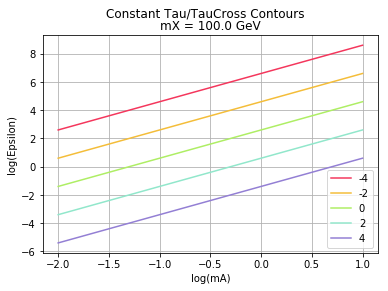

In [82]:
for key in ContourDictionary:
    color = colorDictionary8[key]
    plt.plot(np.log10(maArray), (ContourDictionary[key]), color, label = key)

plt.legend(loc = 'lower right')
plt.xlabel('log(mA)')
plt.ylabel('log(Epsilon)')
plt.suptitle('Constant Tau/TauCross Contours')
plt.title('mX = {0} GeV'.format(Filem_X))
plt.grid()
# plt.axis([-2,1,-10,-5])

print ('Complete')

------------

## Python Function Summary: (TO DO)
This is a list of all the functions, input parameters, and return values in this notebook.

**accumulate(index)**: accululates the summand (see function definition) from 'index' to the final index of the radiusList

**numDensityList(element)[index]**: returns the number density of 'element' at 'index'

**formFactor2(E, element)**: returns the form factor squared of 'element' with recoil energy 'E'

**eqn09Guts(E, m_A, element)**: returns $\frac{m_N}{2m_N E_R + m_A\prime ^2} \text{formFactor2}$ for 'element' and recoil energy 'E'

**DMVelDistNormalization(u)**: returns the reciprocal of the normalization $N_0$

**DmVelDist(u, N_0 = N_01)**: returns the fraction of DM partiles with incident velocity 'u' in the Galactic Frame 

**ModDMVelDist(u)**: returns the fraction of DM particles with incident velocity 'u' in the Earth Frame

**eMin(u, m_X)**: returns $ E_{Min} = \frac{1}{2} m_X u^2 $

**emax(u, rIndex, m_X, element)**: returns $E_{Max} = 2 m_N m_X^2 \frac{(u^2 + v_{\oplus}^2)}{(m_N + m_X)^2}$

**IntDuDEr(rIndex, m_X, m_A, element)**: returns $ \int_{0}^{uInt} \, \int_{eMin}^{eMax} \, \text{u(eqn09Guts)(DMVelDist)} \, dE_R \, du $

**SumOverR(m_X, m_A, element)**: returns $\Sigma_i \, n_N(r) \, r^2 \, \text{IntDuDEr} \, \Delta r $

**totalCap(m_X, m_A, epsilon, alpha, alpha_X, element)**: returns the total capture rate of 'element' $\left[(4\pi)(4\pi)(8\pi \epsilon^2 \alpha_X \alpha Z_N^2)\right] \, n_X \, \text{SumOverR} $



-----------

# Appendix

## A: Python Integration Analysis for the capture integrand
If we try to calculate the capture integral directly in natural units, integrating $u$ from $0$ to $v_{gal}/c$ and $E_R$ from $E_{min}$ to $E_{max}$, we find that the integral returns zero. The differential cross section $\frac{d \sigma_N}{dE_R}$ (eqn09) never vanishes unless one of the model parameters is zero, the incident DM velocity $f(u)$ is never zero for the integraion region over $u$, so the only time the integrand vanishes is at $u=0$, the lower limit of integration. Clearly, there is something more subtle that we need to explore.

To simplify the problem, we choose $m_X = 1$ GeV, and calculate values of Silicon (Si28). We completely remove the integrand and begin by plotting the integration bounds $E_{min}$ and $E_{max}$ in red and blue respectively. The valid region of integration from the heaviside function in eqn (1) is thus above the red curve and below the blue curve.

In [ ]:

#EscVelDictionary =  {  0 < u < vGal/c  |  0 < u < 0.00005 }  (for better resolution)
               #key: { [emin] , [emax]  , [emin] , [emax]  }

EscVelDictionary = { 
    'O16' : ([],[],[],[]),
    'Si28': ([],[],[],[]),
    'Mg24': ([],[],[],[]),
    'Fe56': ([],[],[],[]),
    'Ca40': ([],[],[],[]),
    'P31' : ([],[],[],[]),
    'S32' : ([],[],[],[]),
    'Ni58': ([],[],[],[]),
    'Al27': ([],[],[],[]),
    'Cr52': ([],[],[],[]),
}

# Original and "Zoomed" plot ranges
pltrange0 = np.linspace(0,(V_gal/c),100)
pltrange1 = np.linspace(0,0.0002,100)
m_XTest = 100

for element in EscVelDictionary:
    for u in pltrange0:
        mn2 = amu2Gev(atomicNumbers[element])
#         emin = (1*i**2)/2
        emin = eMin(u, m_XTest)
#         emax = 2*mn2*1**2*(i**2+vMax)/(mn2+1)**2
        emax = eMax(element, m_XTest, 0, u)
#         eLim = 2*mn2*1**2*(1+vMax)/(mn2+1)**2

        EscVelDictionary[element][0].append(emin)
        EscVelDictionary[element][1].append(emax)
        
for element in EscVelDictionary:
    for u in pltrange1:
        mn2 = amu2Gev(atomicNumbers[element])
#         emin = (1*i**2)/2
        emin = eMin(u, m_XTest)
#         emax = 2*mn2*1**2*(i**2+vMax)/(mn2+1)**2
        emax = eMax(element, m_XTest, 0, u)
#         eLim = 2*mn2*1**2*(1+vMax)/(mn2+1)**2

        EscVelDictionary[element][2].append(emin)
        EscVelDictionary[element][3].append(emax)
    
print ('Complete')

In [ ]:
plotElement = 'Ca40'

# Plot 1
plt.figure(1)
line0, = plt.plot(pltrange0,EscVelDictionary[plotElement][0],'red', label = 'eMin')
line1, = plt.plot(pltrange0,EscVelDictionary[plotElement][1],'blue', label = 'eMax')
plt.legend([line0,line1],['eMin','eMax'])
plt.xlabel('Naturalized Velocity: u')
plt.ylabel('E_R (GeV)')
plt.suptitle('Plot over the entire integration limits')
plt.grid()

# Plot 2
plt.figure(2)
line2, = plt.plot(pltrange1,EscVelDictionary[plotElement][2],'red', label = 'eMin')
line3, = plt.plot(pltrange1,EscVelDictionary[plotElement][3],'blue', label = 'eMax')
plt.xlabel('Naturalized Velocity: u')
plt.ylabel('E_R (GeV)')
plt.legend([line2,line3],['eMin','eMax'])
plt.suptitle('Zoom into the origin')
# plt.axis([0,4.8e-5,0,1.2e-7]) # O16
# plt.axis([0.00016555,0.000168,1.384e-6,1.395e-6])
plt.grid()
print ('Complete')

Recalling that the valid region of integration is *above* the red curve and *below* the blue curve, it doesn't appear that there is **any** nonzero region looking at figure 1. Therefor, there must be some region very close to the origin where these two functions yield a nonzero integrand. We investigate further by zooming into the origin, as shown in figure 2.

We can see that only for $u$ between $0$ and $\approx \mathcal{O}(10^{-5})$ is the $E_{max}$ actually above $E_{min}$, which means that in the integration limits as stated above, the integrand vanishes for nearly the entire region due to the Heaviside function. 

To make matters worse, the Python intetegrator  never chooses $u$ values between $0$ and $\approx 0.00002$, giving the illusion that the integral is zero even though it isn't.

The solution is:
    - Solve for the intersection point of Emin and Emax, named "uInt"
    - Integrate u from 0 to uInt
    - Integrate E_R from eMin(u) to eMax(u)

The values of $E_{min}$ and $E_{max}$ both depend on $u$, so the natural solution is for each $u$ value, "zoom in" to the region where the integrand is nonvanishing and calculate the integral in that region. This is acomplished by calculating the $u$ value at the intersection point $E_{min} = E_{max}$.

Substituting $ w^2 = u^2 + v_{\oplus}^2$ gives:

$$ \frac{1}{2}m_X u_{int}^2 = \frac{2\mu_N^2}{m_N}(u_{int}^2 + v_{\oplus}^2) $$

solving for the intersection point $u_{int}$ yields:

$$ u_{int}^2 = \frac{2\mu_N^2}{m_N} \frac{1}{ \left( \frac{1}{2m_X} - \frac{2\mu_N^2}{m_N} \right)  } v_{\oplus}^2 $$

In the function definition, I have made the substitutions:
$$ A = \frac{1}{2}m_X \qquad \text{and} \qquad B = 2 \frac{\mu_N^2}{m_N}$$

yielding: 
$$ \text{uInt} = \sqrt{ \frac{B}{A-B}}\,v_{\oplus} $$
The actual coded function is:

$$ IntDuDEr = \int_{0}^{uInt} du \, u f(u) \int_{E_{min}}^{E_{Max}} dE_R \, \frac{d \sigma_N}{dE_R}  $$


where $\Theta(\Delta E)$ is accounted for in the limits of the $u$ integration.

### Defining the Intersection Function

In [ ]:
plotElement2 = 'O16'

def testIntersection(element, m_X, rIndex):
    mn = amu2Gev(atomicNumbers[element])
    mu = (mn*m_X)/(mn+m_X)
    vCross2 = escVel2List[rIndex]
    # Calculate the intersection uInt of eMin and eMax given a specific rIndex
    A = 1/2. * m_X
    B = 2. * mu**2 / mn
    uInt = np.sqrt( ( B * vCross2) / (A-B) )
    
    return uInt

uInt = testIntersection(plotElement2, m_XTest, 0)

print ('uInt: {0}'.format(uInt))

print ('Complete')

### Testing the Intersection Function

We calculate the intersection for an given element in the previous cell and then zoom into the region near the intersection

In [ ]:
xmin = uInt - 0.000002
xmax = uInt + 0.000002
ymin = eMin(uInt,m_XTest) - 0.2e-7
ymax = eMin(uInt,m_XTest) + 0.2e-7

line2, = plt.plot(pltrange1,EscVelDictionary[plotElement2][2],'red', label = 'eMin')
line3, = plt.plot(pltrange1,EscVelDictionary[plotElement2][3],'blue', label = 'eMax')
plt.xlabel('Naturalized Velocity: u')
plt.ylabel('E_R (GeV)')
plt.legend([line2,line3],['eMin','eMax'])
plt.suptitle('Intersection Sanity Check')
plt.grid()
plt.axis([xmin,xmax,ymin,ymax])

print ('Intersection (u,E_R) = ({0}, {1})'.format(uInt,eMin(uInt,m_XTest)))
print ('Complete')